# Predicting heart disease using machine learning 

This notebook looks into using various Python machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether some have heart disease or not based on medical attributes or features. 

We are going to take the following approach: 

1. Problem definition 
2. Data
3. Evaluation 
4. Features
5. Modeling 
6. Experimentation 

## 1. Problem Definition 
How can we predict if a patient has heart disease or not? 


## 2. Data
The data for this project was gotten from this [Kaggle account](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)


## 3. Evaluation - set a benchmark 
The goal is to get a model that achieves a 95% accuracy in predicting if a patient has heart disease or not. 


## 4. Features
This shows the different features of the dataset and what they mean for ease of analysis. 


There are 14 major features of this dataset: 

1. age: age in years

2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type
    - Value 0: typical angina (caused by decrease in heart blood supply) 
    - Value 1: atypical angina (not related to heart condition)
    - Value 2: non-anginal pain 
    - Value 3: asymptomatic (chest paint but no sign disease)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    - anything above 130-140 is alarming

5. chol: serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - above 126 signals diabetes

7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (abnormal heartbeat)
    - Value 2: showing probable or definite left ventricular enlargement

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping (better heart-rate with exercise; uncommon)
    - Value 1: flatsloping (minimal change; healthy heart)
    - Value 2: downsloping (unhealthy heart)

12. ca: number of major vessels (0-3) colored by flouroscopy
    - colored vessel: indicates blood flow and the more blood movement is preferred. 

13. thal: 
    - Value 0: normal 
    - Value 1: fixed defect (previously defected)
    - Value 2: reversible defect: no blood flow during exercise (little to no blood flow during exercise)

14. condition: 0 = no disease, 1 = disease

### Import all the tools needed

In [2]:
# regular exploratory data analysis and plotting libraries 
import pandas as pd 
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 4, Finished, Available)

### Import Models
To find the models to use for this problem, use the [Scikit map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [3]:
# models from scikit learn as needed according to scikit map 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 5, Finished, Available)

### Import model evaluations 

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# This next part is not neccesarily needed for Fabric because Fabric easily measures metrics.          
# For the sake of graphs
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 6, Finished, Available)

## Load Data

In [6]:
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/heart_cleveland_upload.csv"
df = pd.read_csv("/lakehouse/default/" + "Files/heart_cleveland_upload.csv")
display(df)

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 8, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, 8eaaed69-dbfb-4c9f-bc91-a3700f01d23f)

## 5. Data Exploration (E.D.A)

In [6]:
# To see the number of columns and rows in the dataset
rows, columns = df.shape
print('Number of rows:', rows)
print('Number of columns:', columns)

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 8, Finished, Available)

Number of rows: 297
Number of columns: 14


### Data Distribution 
We need to see the distribution of the dataset.

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 20, Finished, Available)

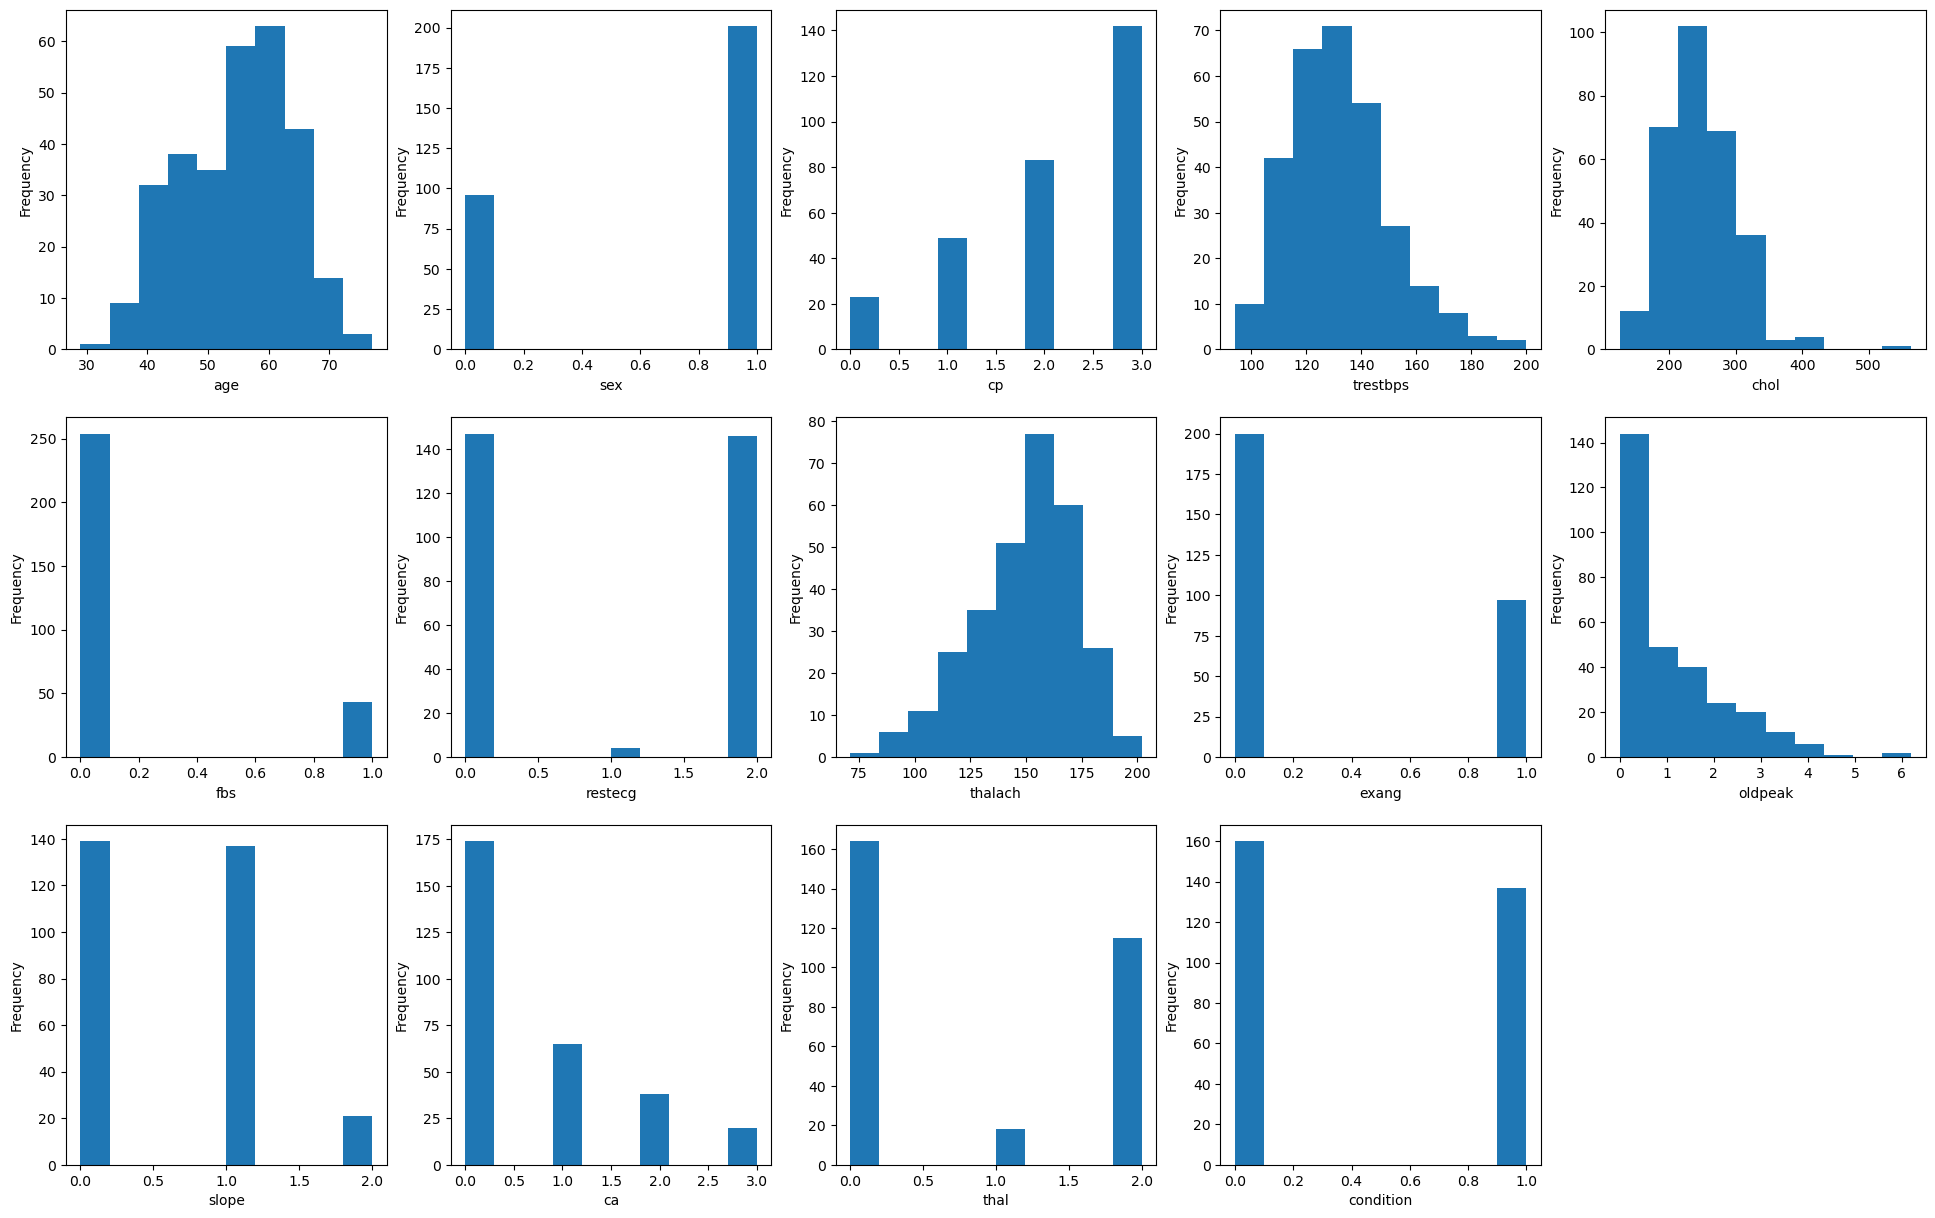

In [18]:
fig = plt.figure(figsize = (24, 15))
i = 0
for column in df: 
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(column)
    df[column].plot(kind = 'hist')
    i = i + 1

### Categorical Features vs Target Features

There are several characteristics that can influence if an individual can have heart diseases. 

For this section, we will comparing sex, chest pain, rest ecg, exang, slope, angina, thal and fasting blood sugar.  

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 19, Finished, Available)

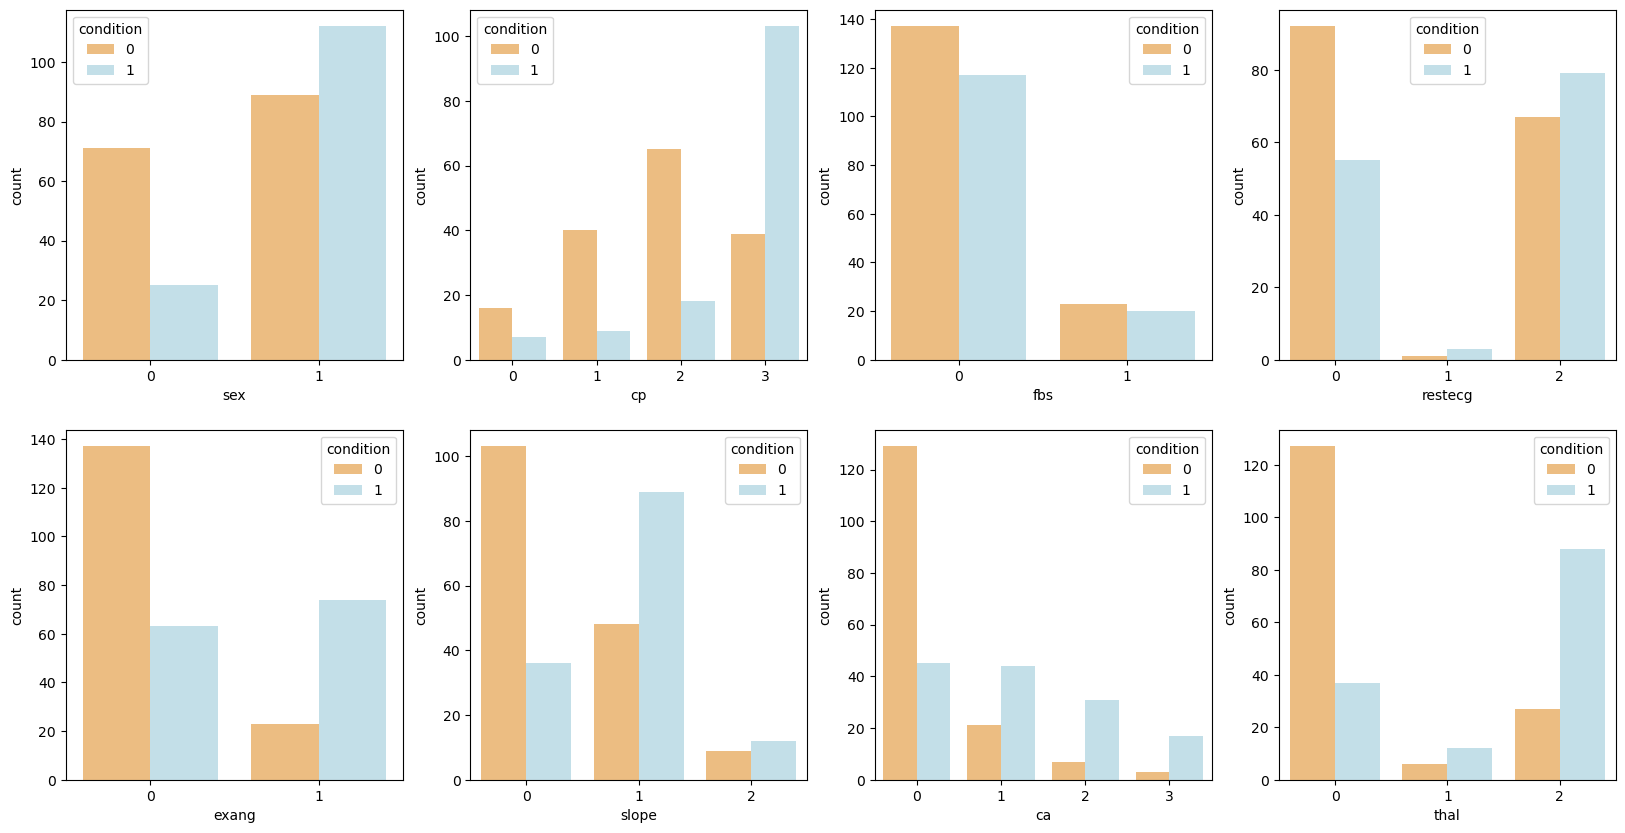

In [17]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize = (20, 10))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    chart = sns.countplot(data = df, x = column, hue = 'condition', palette = 'RdYlBu')

### Heart disease frequency according to sex 

Let's look at comparison to sex. 

In [9]:
pd.crosstab(df.sex, df.condition)

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 11, Finished, Available)

condition,0,1
sex,,
0,71,25
1,89,112


StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 23, Finished, Available)

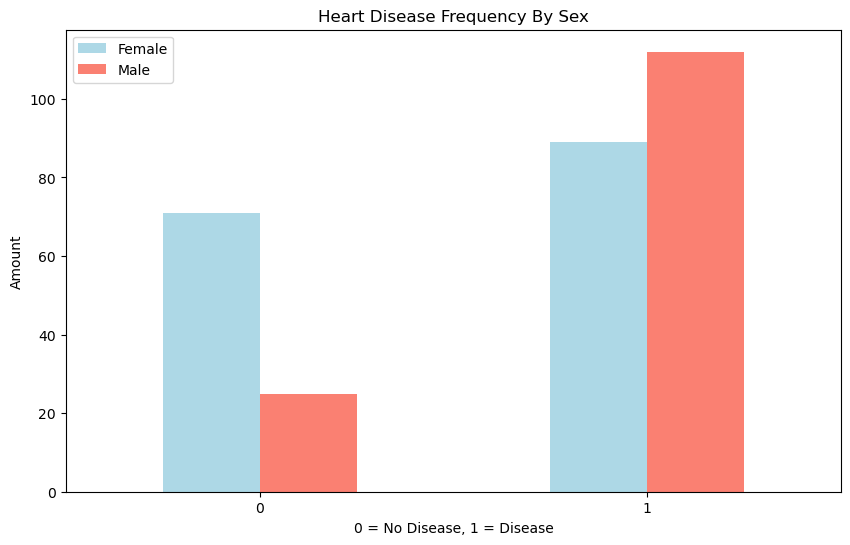

In [21]:
pd.crosstab(df.sex, df.condition).plot(kind = 'bar',
                                       figsize = (10, 6),
                                       color = ['lightblue', 'salmon']);

# Add attributes to the plot to make it more realistic
plt.title('Heart Disease Frequency By Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

The visual above shows the comparison between males and females for heart diseases. 

**Males:** In this dataset, there are 201 males. Based on the above, 112 out of 201 men (55%) are more likely to have a heart disease.

**Females:** There are 96 females in this dataset, and according to the visual, 25 out of 96 women (26%) are more likely to have a heart disease. 

On average, both males and females are 40.5% likely to have a heart disease. 

### Age vs Max Heart Rate for Disease 

Two factors that also influence if an individual has a heart disease are: heart rate (thalach) and age. 

It is expected that individuals with the highest heart rate and/or the oldest are more susceptible to heart diseases. 

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 15, Finished, Available)

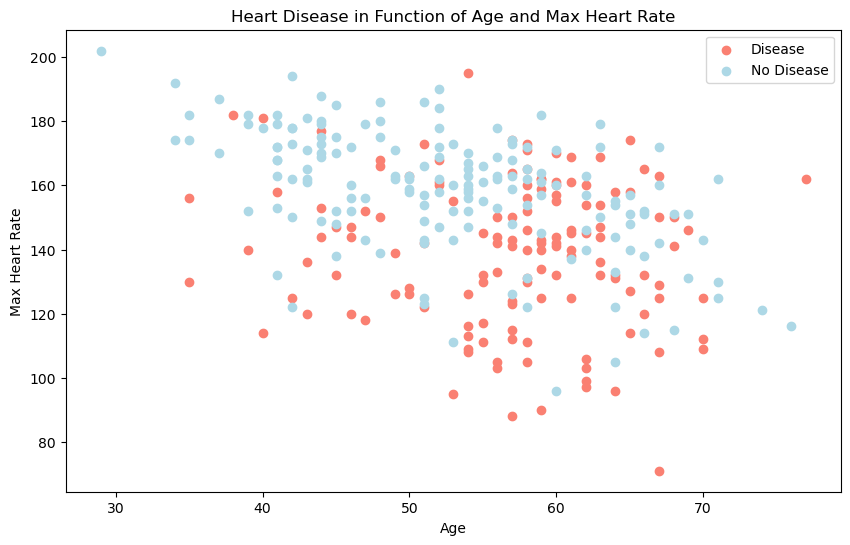

In [13]:
plt.figure(figsize = (10, 6))

# scatter plot with positive samples
plt.scatter(df.age[df.condition == 1],
            df.thalach[df.condition == 1],
            c = 'salmon')

# scatter plot with negative samples
plt.scatter(df.age[df.condition == 0],
            df.thalach[df.condition == 0],
            c = 'lightblue')

# add graph info
plt.title('Heart Disease in Function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

From the graph above, the older the individual (50-70 years old), the more susceptible they are to heart diseases. This might be due to the age distribution of our dataset. 

The graph also shows that there lower heart rates are more correlated with the onset of heart diseases. This could mean that the affected heart is unable to effectively pump blood.

### Heart Disease Frequency by Chest Pain 

Chest pain or angina, can also be a massive indicator of heart diseases. However, there are different types of chest pain, and some types may not be indicators of heart diseases at all. 

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 24, Finished, Available)

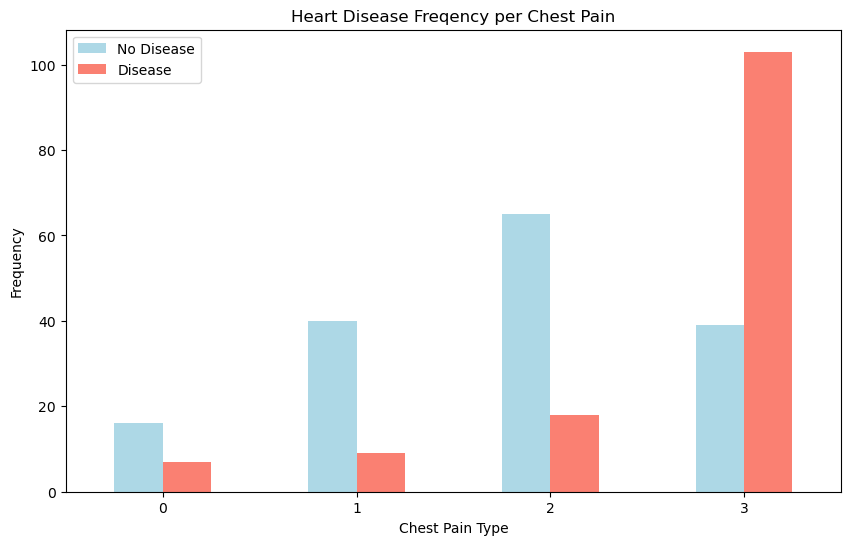

In [22]:
pd.crosstab(df.cp, df.condition).plot(kind =  'bar', 
                                      figsize = (10, 6),
                                      color = ['lightblue', 'salmon']);

# Add attributes to the plot to make it more realistic
plt.title('Heart Disease Freqency per Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);

If we remember the cp category from the data dictionary: 

0: Typical angina

1: Atypical angina

2: Non-angina pain

3: Asymptomatic

It is surprising that asymptomatic chest pain is most correlated with instances of heart diseases.


### Correlation Matrix

A correlation matrix can be used to compare the correlation of all the independent variables on the dependent variable (condition). 

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

StatementMeta(, 88f7f88a-7a12-487c-ab05-dcc904423bf1, 25, Finished, Available)

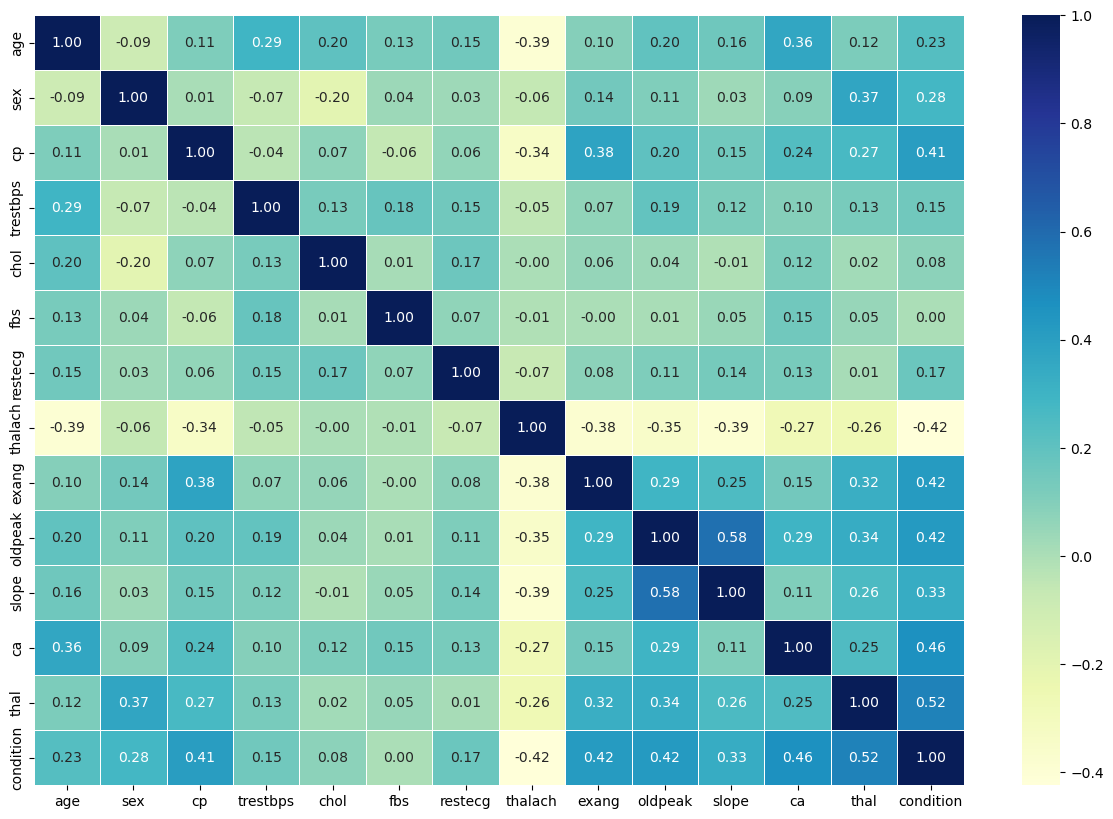

In [23]:
# Find the correlation between independent variables
corr_matrix = df.corr()
corr_matrix

# Let's make it lok a little prettier
corr_matrix = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = '.2f',
            cmap = 'YlGnBu');

From the above figure: 
- previous cardiac history (thal) and blood flow (ca) are most positively correlated with heart disease conditions. 
- max heart rate (thalach) is the most negatively correlated with heart disease conditions.

## 6. Modeling

In [7]:
# Split data into x and y 
x = df.drop('condition', axis = 1)
y = df['condition']

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 9, Finished, Available)

In [8]:
# split data into train and test sets 
np.random.seed(42)

# split into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 10, Finished, Available)

In [8]:
import mlflow
experiment_name = 'experiment-heart1'
mlflow.set_experiment(experiment_name)

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 10, Finished, Available)

2023/07/09 17:15:51 INFO mlflow.tracking.fluent: Experiment with name 'experiment-heart1' does not exist. Creating a new experiment.


<Experiment: artifact_location='', creation_time=1688922954480, experiment_id='cee9a60b-ad86-4979-a228-176de25e86d0', last_update_time=None, lifecycle_stage='active', name='experiment-heart1', tags={}>

In [9]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

with mlflow.start_run():
    mlflow.autolog()

    model = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

    mlflow.log_param('estimator', 'LogisticRegression')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 11, Finished, Available)

2023/07/09 17:16:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:16:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:16:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:16:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [10]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run():
    mlflow.autolog()

    model = DecisionTreeClassifier().fit(x_train, y_train)

    mlflow.log_param('estimator', 'DecisionTreeClassifier')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 12, Finished, Available)

2023/07/09 17:16:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:16:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:16:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:16:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [11]:
# SVC model 
from sklearn.svm import SVC

with mlflow.start_run():
    mlflow.autolog()

    model = SVC().fit(x_train, y_train)

    mlflow.log_param('estimator', 'SVC')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 13, Finished, Available)

2023/07/09 17:17:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:17:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:17:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:17:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [12]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run():
    mlflow.autolog()

    model = KNeighborsClassifier().fit(x_train, y_train)

    mlflow.log_param('estimator', 'KNeighborsClassifier')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 14, Finished, Available)

2023/07/09 17:17:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:17:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:17:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:17:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [13]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run():
    mlflow.autolog()

    model = RandomForestClassifier().fit(x_train, y_train)

    mlflow.log_param('estimator', 'RandomForestClassifier')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 15, Finished, Available)

2023/07/09 17:18:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:18:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:18:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:18:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [14]:
# Gaussian Classifier Model

from sklearn.naive_bayes import GaussianNB

with mlflow.start_run():
    mlflow.autolog()

    model = GaussianNB().fit(x_train, y_train)

    mlflow.log_param('estimator', 'GaussianNB')

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 16, Finished, Available)

2023/07/09 17:18:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/07/09 17:18:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/09 17:18:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2023/07/09 17:18:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns 

In [15]:
# Retrieve experiment info 
import mlflow
experiments = mlflow.search_experiments()
for exp in experiments: 
    print(exp.name)

mlflow.search_runs(exp.experiment_id)

StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 17, Finished, Available)

experiment-heart
experiment-heart1


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_recall_score,metrics.training_roc_auc,metrics.training_precision_score,metrics.training_f1_score,...,params.priors,params.var_smoothing,tags.mlflow.rootRunId,tags.synapseml.notebook.artifactId,tags.mlflow.user,tags.mlflow.runName,tags.estimator_class,tags.synapseml.user.name,tags.synapseml.user.id,tags.estimator_name
0,43d24b02-8f4b-4a13-ba7a-25274b3e4113,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:16:18.694000+00:00,2023-07-09 17:16:25.604000+00:00,0.873418,0.943091,0.873502,0.873208,...,None,None,43d24b02-8f4b-4a13-ba7a-25274b3e4113,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,dynamic_pig_hng1266z,sklearn.linear_model._logistic.LogisticRegression,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,LogisticRegression
1,9273f0da-f2a2-4ea6-84db-45116f0773e8,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:16:41.247000+00:00,2023-07-09 17:16:45.784000+00:00,1.000000,1.000000,1.000000,1.000000,...,None,None,9273f0da-f2a2-4ea6-84db-45116f0773e8,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,nice_turnip_rq86x67j,sklearn.tree._classes.DecisionTreeClassifier,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,DecisionTreeClassifier
2,1eb85e33-0695-4540-bf01-f609d15392d2,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:17:27.963000+00:00,2023-07-09 17:17:32.699000+00:00,0.696203,NaN,0.710936,0.683768,...,None,None,1eb85e33-0695-4540-bf01-f609d15392d2,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,witty_square_2gvm7yxw,sklearn.svm._classes.SVC,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,SVC
3,b0ffe596-20ad-4437-880f-013f5aed4502,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:17:50.636000+00:00,2023-07-09 17:17:55.490000+00:00,0.776371,0.859088,0.776239,0.776291,...,None,None,b0ffe596-20ad-4437-880f-013f5aed4502,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,placid_picture_917c179t,sklearn.neighbors._classification.KNeighborsCl...,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,KNeighborsClassifier
4,24dacdb9-21bc-4b39-b05f-0bb6a4522f03,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:18:17.522000+00:00,2023-07-09 17:18:22.334000+00:00,1.000000,1.000000,1.000000,1.000000,...,None,None,24dacdb9-21bc-4b39-b05f-0bb6a4522f03,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,loyal_eye_7dv7btsy,sklearn.ensemble._forest.RandomForestClassifier,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,RandomForestClassifier
5,d0ef5932-d95b-4bce-8dc8-a4bff875fd9c,cee9a60b-ad86-4979-a228-176de25e86d0,FINISHED,sds://lake.trident.com/b1f6781e-4a1e-4bc1-b2ee...,2023-07-09 17:18:37.579000+00:00,2023-07-09 17:18:42.024000+00:00,0.873418,0.929186,0.875271,0.872754,...,None,1e-09,d0ef5932-d95b-4bce-8dc8-a4bff875fd9c,dfc80c32-3aec-4499-b928-d44417bff28c,4b3a56ea-6f42-450e-b7c3-fb2932c7ac32,dreamy_wheel_6yq9fw8c,sklearn.naive_bayes.GaussianNB,Chidubem Ngini,73f170e2-35d0-48f2-b419-ac6d6d0f2d77,GaussianNB


StatementMeta(, 63b390a9-9f7d-4268-9de3-586a187e775f, 20, Finished, Available)

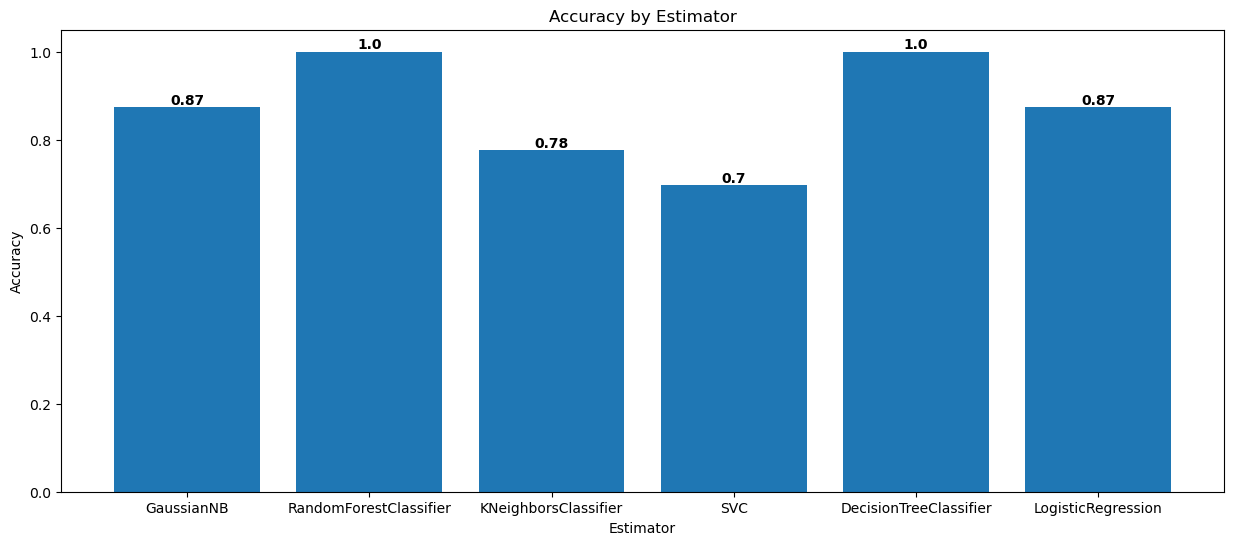

In [18]:
# create a graph to compare models by accuracy
import matplotlib.pyplot as plt

df_results = mlflow.search_runs(exp.experiment_id, order_by = ['start_time DESC'])[['metrics.training_accuracy_score', 'params.estimator']]

fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(df_results['params.estimator'], df_results['metrics.training_accuracy_score'])
ax.set_xlabel('Estimator')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Estimator')
for i, v in enumerate(df_results['metrics.training_accuracy_score']):
    ax.text(i, v, str(round(v, 2)), ha = 'center', va = 'bottom', fontweight = 'bold')
plt.show()

From our preliminary analysis, Random Forest  Classifier and Decision Tree Classifier models are the most accurate. 

## 7. Hyperparameter Tuning 

Having figured out the best two parameters, it is time to figure out the best parameters to use to give the best results. 

We can use RandomizedSearchCV and GridSearch CV to carry this out

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of trees
    'max_depth': randint(3, 10),         # Maximum depth of each tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
}

# Create an instance of the Random Forest Classifier
rf = RandomForestClassifier()

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the randomized search on your training data
random_search.fit(x_train, y_train)

# Get the best estimator and its parameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 25, Finished, Available)

In [28]:
# see the best parameters for the random forest model 
best_params

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 30, Finished, Available)

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 635}

In [29]:
# see the best estimator for the random forest model
best_estimator

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 31, Finished, Available)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=635)

In [33]:
# see the score for the random forest model
rf_score = random_search.score(x_test, y_test)
rf_score

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 35, Finished, Available)

0.7166666666666667

In [24]:
# Tune the decision tree classifier with randomized search CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'max_depth': randint(3, 10),         # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
}

# Create an instance of the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create an instance of RandomizedSearchCV
dt_random_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the randomized search on your training data
dt_random_search.fit(x_train, y_train)

# Get the best estimator and its parameters
dt_best_estimator = dt_random_search.best_estimator_
dt_best_params = dt_random_search.best_params_


StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 26, Finished, Available)

In [32]:
# see the score for the decision tree model
dt_score = dt_random_search.score(x_test, y_test)
dt_score

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 34, Finished, Available)

0.6833333333333333

In [26]:
# get the best estimator 
dt_best_estimator

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 28, Finished, Available)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=9)

In [27]:
# get the best parameters
dt_best_params

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 29, Finished, Available)

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 9}

StatementMeta(, 62087512-7c0f-41fb-878e-32df327c8984, 36, Finished, Available)

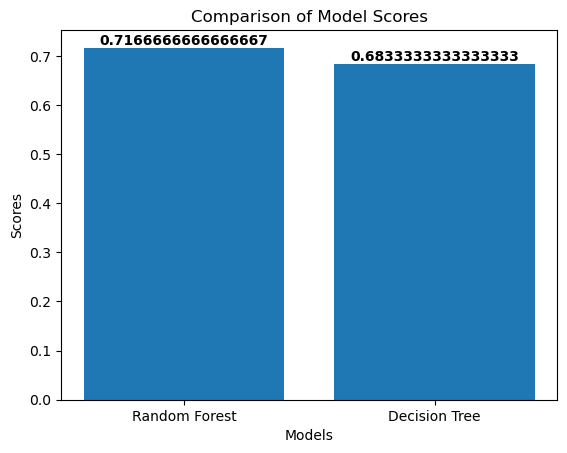

In [34]:
import matplotlib.pyplot as plt

# Define the models and their corresponding scores
models = ['Random Forest', 'Decision Tree']
scores = [rf_score, dt_score]

# Create a bar plot
plt.bar(models, scores)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')

# Display the scores on top of each bar
for i, v in enumerate(scores):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()


From the graph above, the random forest model has the highest score so we can tune it further with GridSearchCV. 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],          # Number of trees
    'max_depth': [None, 5, 10],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
}

# Create an instance of the Random Forest Classifier
rf = RandomForestClassifier()

# Create an instance of GridSearchCV
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Fit the grid search on your training data
rf_grid_search.fit(x_train, y_train)

# Get the best estimator and its parameters
rf_best_estimator = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 13, Finished, Available)

In [12]:
# The best grid search parameters for random forest
rf_best_params

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 14, Finished, Available)

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [13]:
# model score after using grid search
rf_grid_score = rf_grid_search.score(x_test, y_test)
rf_grid_score
print('Our score has improved to:', rf_grid_score)

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 15, Finished, Available)

Our score has improved to: 0.7166666666666667


Let's see how our model does on prediction

In [14]:
# Make a prediction with our tuned random forest model 
y_pred = rf_grid_search.predict(x_test)
y_pred

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 16, Finished, Available)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 17, Finished, Available)

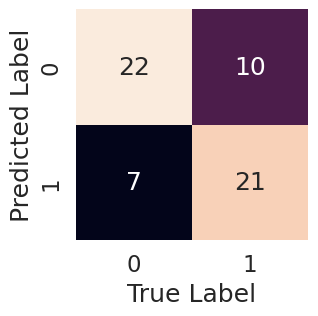

In [15]:
# compare predicted values in a confusion matrix
from sklearn.metrics import confusion_matrix

sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_pred):
    '''
    Plots a nice looking confusion matrix using Seaborn heatmap
    '''
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot = True,
                     cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_pred);

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the RandomForestClassifier with the specified hyperparameters
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100)

# Calculate the cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf, x, y, cv=5, scoring='accuracy'))

# Print the cross-validated accuracy
print(cv_acc)


StatementMeta(, ae5ba259-6c05-4944-a85a-d3b0538127f2, 19, Finished, Available)

0.7611299435028249


Our accuracy is 76.1% 